In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import xgboost as xgb

from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier

from datetime import timedelta, date

from sklearn import metrics

pd.options.display.max_columns = 60

from imblearn.combine import SMOTETomek

In [3]:
data = pd.read_csv("C:/Users/m1013523/Desktop/LTFS/train_aox2Jxw/train.csv")
test = pd.read_csv("test_bqCt9Pv.csv")

In [4]:
data.drop('UniqueID',axis=1,inplace=True)
Unique_ID = test[['UniqueID']]
test.drop('UniqueID',axis=1,inplace=True)

#### Basic Submission with the Mode of loan default variable.

In [66]:
test = pd.read_csv("test_bqCt9Pv.csv")

In [67]:
ID = test[['UniqueID']]

In [68]:
ID['loan_default'] = 0

C:\Users\m1013523\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [70]:
ID.to_csv("Basic_Submission.csv",index=None)

#### End of Basic Submission.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [55]:
data.head(10)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [56]:
data.shape

(233154, 41)

In [57]:
data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [5]:
# Checking the distribution of loan_defaults variable. 21% of the applicants have defaulted on the first emi on the due date. 
# So the data is fairly imbalanced data.
data['loan_default'].value_counts()/len(data)

0    0.782929
1    0.217071
Name: loan_default, dtype: float64

In [6]:
# Checking if the DisbursalDate variable has been read properly.
data['DisbursalDate'].head()

0    03-08-18
1    26-09-18
2    01-08-18
3    26-10-18
4    26-09-18
Name: DisbursalDate, dtype: object

### Univariate Analysis

#### Disbursed Amount

In [7]:
data['disbursed_amount'].describe()
# Average Amount is around 54356 with Minimum being 13320. Maximum value seems to be an outlier worth exploring.
# There seem to be very few outliers compared to the size of the dataset which can be ignored.

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

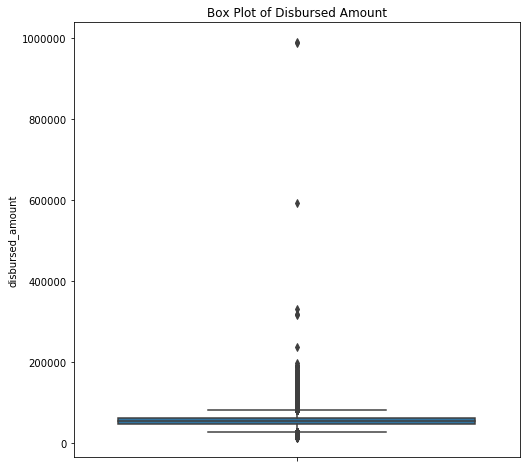

In [8]:
plt.figure(figsize=(8,8))
plt.title("Box Plot of Disbursed Amount")
sns.boxplot(data=data,x='disbursed_amount',orient="v",fliersize=5)

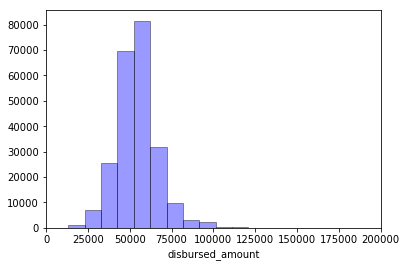

In [9]:
plt.xlim(0,200000)
sns.distplot(data['disbursed_amount'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Ignoring the outliers, the distribution of disbursed amount looks fairly normal.

#### Asset Cost

In [10]:
data['asset_cost'].describe().apply(lambda x: format(x, 'f'))
# Average asset cost seems to be 75865 with Minimum being 37000 and maximum being 1628992 which is way above the other values.

count     233154.000000
mean       75865.068144
std        18944.781289
min        37000.000000
25%        65717.000000
50%        70946.000000
75%        79201.750000
max      1628992.000000
Name: asset_cost, dtype: object

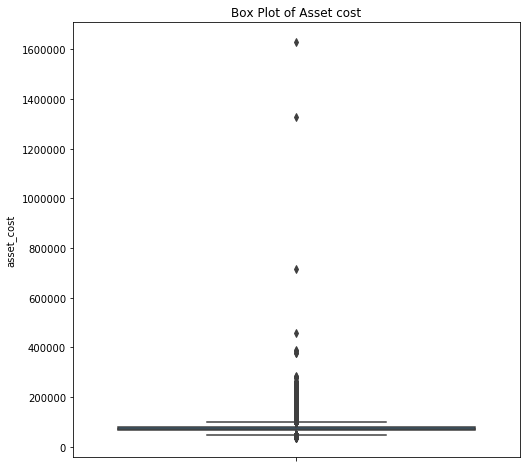

In [11]:
plt.figure(figsize=(8,8))
plt.title("Box Plot of Asset cost")
sns.boxplot(data=data,x='asset_cost',orient="v",fliersize=5)
# Here also there are a few outliers. It makes sense to explore these and find if they are genuine.

In [12]:
data.asset_cost.quantile(0.95)

109680.0

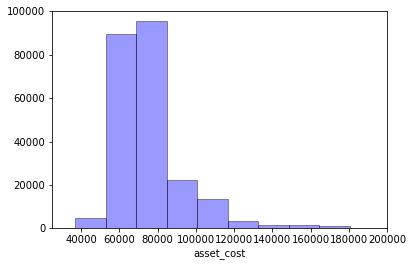

In [13]:
plt.xlim(25000,200000)
sns.distplot(data['asset_cost'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Looks like positively skewed distribution with many values in the beginning and few at the end.

In [14]:
data[data['asset_cost'] > 300000]
# The below table corroborates the fact that if the asset cost is high, then the disbursed amount is high too.

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
86675,987354,1328954,75.25,2,24670,156,2378,15-08-91,Self employed,27-10-18,4,163,1,1,0,0,0,0,567,J-High Risk,10,8,0,1163274,1381825,1368528,0,0,0,0,0,0,23836,0,2,1,0yrs 9mon,1yrs 11mon,3,0
192606,332045,459625,72.89,138,15306,49,3388,21-09-93,Salaried,03-10-18,9,2691,1,1,1,0,0,0,761,B-Very Low Risk,2,2,0,214398,400000,400000,0,0,0,0,0,0,0,0,0,0,1yrs 5mon,1yrs 6mon,0,0
210250,315904,378092,84.64,138,24062,152,3367,12-05-88,Salaried,04-09-18,9,2934,1,1,1,0,0,0,670,F-Low Risk,7,6,0,1352433,2386822,2131476,0,0,0,0,0,0,11033,0,0,0,3yrs 2mon,6yrs 2mon,0,0
210251,196998,378092,52.90,138,24062,152,3395,03-01-84,Salaried,06-09-18,9,2934,1,1,1,0,0,0,796,B-Very Low Risk,7,5,0,2317306,2806384,2791305,0,0,0,0,0,0,23728,0,0,0,3yrs 9mon,10yrs 2mon,0,0
210252,990572,1628992,61.39,138,24062,152,3368,16-06-90,NaN,16-08-18,9,2934,1,1,1,0,0,0,16,Not Scored: No Activity seen on the customer (...,1,0,1,0,0,0,0,0,0,0,0,0,6224,0,0,0,5yrs 10mon,5yrs 10mon,0,0
210253,318533,388025,84.79,138,24062,152,3321,30-12-73,Self employed,17-10-18,9,2934,1,1,1,0,0,0,645,G-Low Risk,45,14,0,4328346,8292063,8293557,0,0,0,0,0,0,45117,0,3,0,1yrs 5mon,5yrs 7mon,1,0
210254,237779,383600,62.57,138,24062,152,3371,02-03-89,Salaried,06-10-18,9,2934,1,1,1,0,0,0,778,B-Very Low Risk,5,1,0,21778,45500,52730,0,0,0,0,0,0,25807,0,0,0,2yrs 6mon,5yrs 6mon,0,0
210255,592460,715186,83.89,138,24062,152,3392,25-06-93,Salaried,04-09-18,9,2934,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,2,0


#### Itv variable (Loan To Asset Value)

In [15]:
data['ltv'].describe()
# On an average 74% of the value of the asset is taken as the loan amount.
# Minimum value is 10% and the maximum value is 95%

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: ltv, dtype: float64

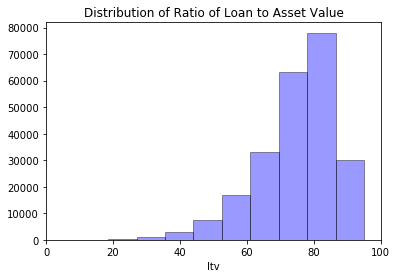

In [16]:
plt.xlim(0,100)
sns.distplot(data['ltv'], hist=True, kde=False, 
             bins=10, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title("Distribution of Ratio of Loan to Asset Value")
# A typical Negatively skewed distribution. Lot of values around 70 to 80%.

#### Branch ID 

In [17]:
data['branch_id'].nunique()
# Basically there are 82 branches from where the loan was disbursed. This is a categorical variable and not continuous.

82

In [18]:
data['branch_id'].value_counts().sort_values(ascending=False).head(10)
# Top 10 branches have disbursed significantly higher loans as compared to the others.

2      13138
67     11328
3       9230
5       9218
36      8832
136     7833
34      7794
16      6466
19      5860
1       5709
Name: branch_id, dtype: int64

#### Supplier ID

In [19]:
data['supplier_id'].nunique()

2953

In [20]:
data['supplier_id'].value_counts().sort_values(ascending=False).head(10)

18317    1432
15694    1300
15663    1275
17980    1268
14234    1258
18166    1210
21980    1125
14375    1119
22727    1062
14145    1060
Name: supplier_id, dtype: int64

#### Current Pin Code

In [21]:
data['Current_pincode_ID'].nunique()
# 6698 unique Values of pin codes

6698

#### Date Of Birth

In [241]:
# It does not make sense to use DOB as a variable in modelling. So it is better to find out the age of the customer.

In [22]:
def dob (df,column):
    df[column] = pd.to_datetime(df[column])
    future = df[column] > date(year=2050,month=1,day=1)
    df.loc[future, column] -= timedelta(days=365.25*100)
    df['Age'] = 2019 - df['Date.of.Birth'].dt.year
    df.drop('Date.of.Birth',axis=1,inplace=True)
dob(data,'Date.of.Birth')
dob(test,'Date.of.Birth')

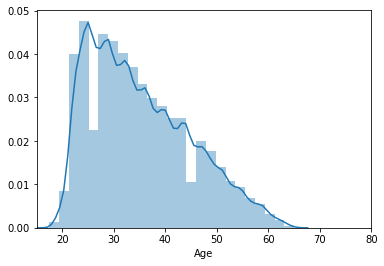

In [23]:
plt.xlim(15,80)
sns.distplot(data['Age'])

#### Employment Type

In [24]:
data['Employment.Type'].value_counts(dropna=False)
# Since there are higher number of Self Employed customer as compared to Salaried, Missing values are imputed as Self Employed.

Self employed    127635
Salaried          97858
NaN                7661
Name: Employment.Type, dtype: int64

In [245]:
# Loan Default ratio of people who did not furnish their employment type
data[data['Employment.Type'].isnull()]['loan_default'].value_counts()

0    6017
1    1644
Name: loan_default, dtype: int64

In [25]:
def emptype(df,column):
    df[column].fillna('Others',inplace=True)
emptype(data,'Employment.Type')
emptype(test,'Employment.Type')

#### Disbursal Date

In [26]:
def disbursaldate(df,column):
    df[column] = pd.to_datetime(df[column])
    df['Disbursed_Month'] = df[column].dt.month
    df['Disbursed_Day'] = df[column].dt.day
    df['Disbursed_Quarter'] = df[column].dt.quarter
    df['Disbursed_Qtr_End'] = df[column].dt.is_quarter_end
    df['Disbursed_Qtr_Start'] = df[column].dt.is_quarter_start
    df['Disbursed_Day_Of_Week'] = df[column].dt.dayofweek
    df.drop('DisbursalDate',axis=1,inplace=True)
disbursaldate(data,'DisbursalDate')
disbursaldate(test,'DisbursalDate')

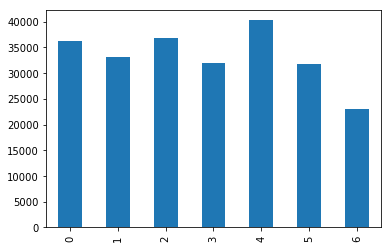

In [27]:
# Almost similar distribution except on a Sunday when it is less
data['Disbursed_Day_Of_Week'].value_counts().sort_index().plot(kind='bar')

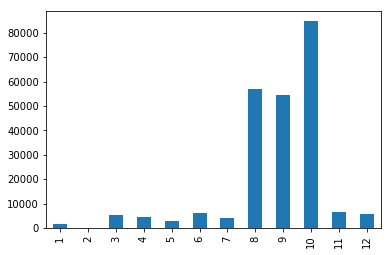

In [28]:
data['Disbursed_Month'].value_counts().sort_index().plot(kind='bar')
# One can see that the Disbursed loans shoot up drastically in the month of August, September and October

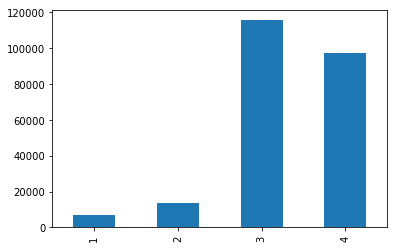

In [30]:
data['Disbursed_Quarter'].value_counts().sort_index().plot(kind='bar')
# No wonder that the values are high during third and fourth quarters

#### State_ID

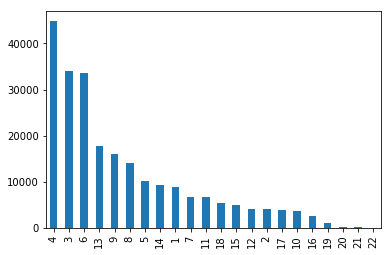

In [31]:
data['State_ID'].value_counts().plot(kind='bar')
# States 4 , 3 and 6 constitute a large number in the disbursal of loans.

#### Employee_Code_ID

In [32]:
data['Employee_code_ID'].nunique()
# There are 3270 employees who disbursed a total of 233155 loans.

3270

#### MobileNo_Avl_Flag

In [33]:
data['MobileNo_Avl_Flag'].value_counts()
# Everyone has furnished their mobile numbers, since there is no variance, this feature does not add any value to the model.

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [34]:
data.drop('MobileNo_Avl_Flag',axis=1,inplace=True)
test.drop('MobileNo_Avl_Flag',axis=1,inplace=True)

#### Aadhar_flag

In [35]:
data['Aadhar_flag'].value_counts(dropna=False)
# Few customers have not furnished their Adhar Card numbers

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

#### PAN_flag

In [36]:
data['PAN_flag'].value_counts(dropna=False)
# Few customers have not furnished their PAN details.

0    215533
1     17621
Name: PAN_flag, dtype: int64

In [37]:
data[data['PAN_flag'] == 0][['PAN_flag','Aadhar_flag']]
# There is no relation between people who didn't furnish their Aadhar and PAN respectively.

,PAN_flag,Aadhar_flag
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,0


#### VoterID_flag

In [38]:
data['VoterID_flag'].value_counts(dropna=False)

0    199360
1     33794
Name: VoterID_flag, dtype: int64

#### Driving_flag

In [39]:
data['Driving_flag'].value_counts(dropna=False)

0    227735
1      5419
Name: Driving_flag, dtype: int64

#### Passport_flag

In [40]:
data['Passport_flag'].value_counts(dropna=False)

0    232658
1       496
Name: Passport_flag, dtype: int64

#### PERFORM_CNS.SCORE

In [41]:
len(data[data['PERFORM_CNS.SCORE'] == 0])
# Out of the total customers, Credit History information is not available for 116950 of them. So created a new column where the 
# column takes True if the score is 0 else False.

116950

In [42]:
data['PERFORM_CNS.SCORE'].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64

In [43]:
def score(df,column):
    df[column].replace({0:np.NaN},inplace=True)
    #df['Credit_Null'] = df[column].isnull()
    df[column].fillna(df[column].mean(),inplace=True)
score(data,'PERFORM_CNS.SCORE')
score(test,'PERFORM_CNS.SCORE')

In [265]:
"""
data['PERFORM_CNS_SCORE'].replace({580.784267322983:0},inplace=True)
median = np.median(data['PERFORM_CNS_SCORE'])
data['PERFORM_CNS_SCORE'].replace({0:median},inplace=True)
"""

"\ndata['PERFORM_CNS_SCORE'].replace({580.784267322983:0},inplace=True)\nmedian = np.median(data['PERFORM_CNS_SCORE'])\ndata['PERFORM_CNS_SCORE'].replace({0:median},inplace=True)\n"

#### PERFORM_CNS.SCORE.DESCRIPTION

In [44]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [45]:
def score_description(df,column):
    df[column].replace({"A-Very Low Risk":"Very Low","B-Very Low Risk":"Very Low","C-Very Low Risk":"Very Low"
                                              ,"D-Very Low Risk":"Very Low","E-Low Risk":"Low","F-Low Risk":"Low","G-Low Risk":"Low"
                                              ,"H-Very Medium Risk":"Medium","I-Medium Risk":"Medium","J-High Risk":"High",
                                              "K-High Risk":"High","L-Very High Risk":"Very High","M-Very High Risk":"Very High",
                                              "H-Medium Risk":"Medium","Not Scored: Sufficient History Not Available":"Others",
                                              "Not Scored: Not Enough Info available on the customer":"Others","Not Scored: No Activity seen on the customer (Inactive)":"Others",
                                              "Not Scored: No Updates available in last 36 months":"Others","Not Scored: Only a Guarantor":"Others",
                                              "Not Scored: More than 50 active Accounts found":"Others"},inplace=True)
score_description(data,'PERFORM_CNS.SCORE.DESCRIPTION')
score_description(test,'PERFORM_CNS.SCORE.DESCRIPTION')

In [46]:
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available    116950
Very Low                        50728
Low                             18294
Others                          12835
Medium                          12412
High                            12025
Very High                        9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

#### PRI.NO.OF.ACCTS

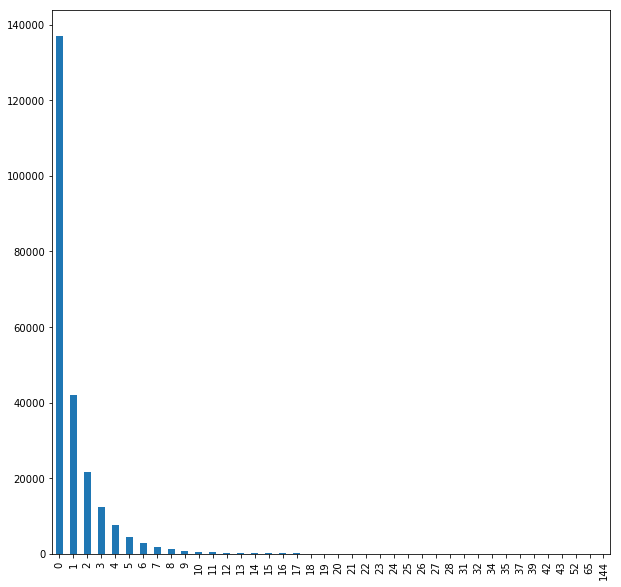

In [47]:
plt.figure(figsize=(10,10))
data['PRI.ACTIVE.ACCTS'].value_counts(dropna=False).sort_index().plot(kind='bar')
# For most of the customers this is their first loan

#### PRI.ACTIVE.ACCTS

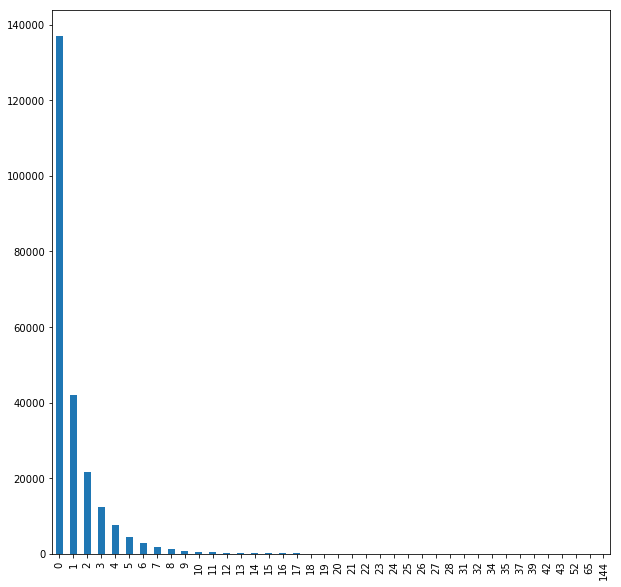

In [270]:
plt.figure(figsize=(10,10))
data['PRI.ACTIVE.ACCTS'].value_counts(dropna=False).sort_index().plot(kind='bar')

#### PRI.OVERDUE.ACCTS 

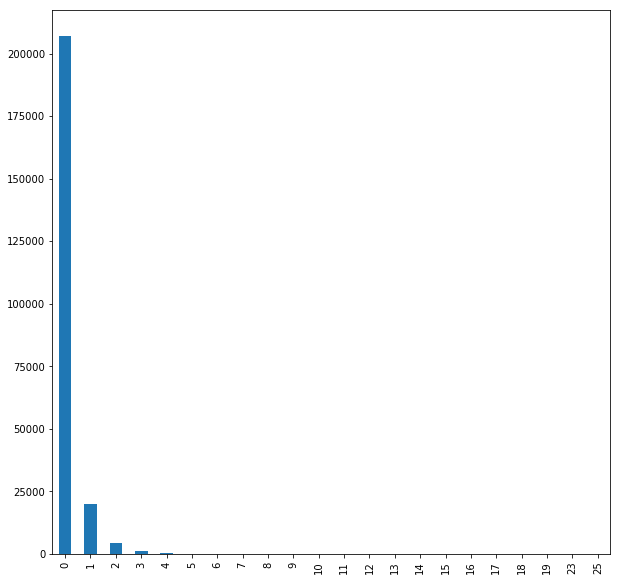

In [271]:
plt.figure(figsize=(10,10))
data['PRI.OVERDUE.ACCTS'].value_counts(dropna=False).sort_index().plot(kind='bar')
# Most of the customers have 0 default accounts at the time of loan disbursement.

#### PRI.CURRENT.BALANCE

In [272]:
data[data['PRI.CURRENT.BALANCE'] < 0]

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,Disbursed_Month,Disbursed_Day,Disbursed_Quarter,Disbursed_Qtr_End,Disbursed_Qtr_Start,Disbursed_Day_Of_Week,Credit_Null
8,53713,61973,89.56,67,22807,45,1497,Self employed,6,1998,1,0,0,0,0,718.0,Very Low,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0,28,5,9,2,False,False,2,False
434,48599,66245,75.48,34,18680,45,1070,Salaried,6,1835,1,0,0,0,0,630.0,Medium,1,1,0,-367,0,0,0,0,0,0,0,0,0,0,0,0,4yrs 0mon,4yrs 0mon,0,0,23,10,29,4,False,False,0,False
810,44909,75001,62.67,11,21475,45,5951,Salaried,3,1464,1,0,0,0,0,532.0,High,1,1,0,-60,15000,15000,0,0,0,0,0,0,0,0,0,0,6yrs 8mon,6yrs 8mon,0,0,37,9,24,3,False,False,0,False
906,50303,71762,71.07,20,24745,45,6181,Self employed,5,385,1,0,0,0,0,671.0,Low,1,1,0,-737,1015,1015,0,0,0,0,0,0,0,0,0,0,4yrs 0mon,4yrs 0mon,0,0,33,10,30,4,False,False,1,False
1289,47845,60281,81.29,20,14158,45,6207,Self employed,5,785,1,0,0,0,0,300.0,Very High,9,4,1,-19342,61029,61029,0,0,0,0,0,0,3264,0,2,0,1yrs 9mon,5yrs 9mon,0,0,37,8,30,3,False,False,3,False
1438,49349,74299,67.30,20,18110,86,6280,Self employed,5,1296,1,0,0,0,0,517.0,High,7,1,1,-706,706,706,0,0,0,0,0,0,5863,0,0,0,2yrs 9mon,8yrs 10mon,0,0,35,9,27,3,False,False,3,False
2401,53078,69699,78.91,42,23132,45,5342,Self employed,3,811,1,0,0,0,0,701.0,Low,5,1,0,-2424,0,0,0,0,0,0,0,0,0,0,0,0,3yrs 0mon,5yrs 3mon,0,0,39,9,19,3,False,False,2,False
2558,45889,63738,75.31,142,17315,86,106,Salaried,16,331,1,0,0,0,0,671.0,Low,1,1,0,-1061,500,500,0,0,0,0,0,0,0,0,0,0,3yrs 10mon,3yrs 10mon,0,0,27,8,21,3,False,False,1,False
3342,57013,74001,78.38,146,14142,45,2997,Salaried,14,661,1,0,0,0,0,671.0,Low,1,1,0,-15,600,600,0,0,0,0,0,0,0,0,0,0,4yrs 0mon,4yrs 0mon,0,0,31,9,19,3,False,False,2,False
4734,39439,74167,53.93,9,22888,49,5373,Self employed,3,1560,1,0,0,0,0,630.0,Medium,1,1,0,-113351,0,0,0,0,0,0,0,0,0,0,0,0,9yrs 7mon,9yrs 7mon,0,0,46,10,26,4,False,False,4,False


In [273]:
data['PRI.CURRENT.BALANCE'].describe().apply(lambda x: format(x, 'f'))

count      233154.000000
mean       165900.076936
std        942273.582355
min      -6678296.000000
25%             0.000000
50%             0.000000
75%         35006.500000
max      96524920.000000
Name: PRI.CURRENT.BALANCE, dtype: object

#### PRI.SANCTIONED.AMOUNT

In [274]:
data['PRI.SANCTIONED.AMOUNT'].describe().apply(lambda x: format(x,'f'))

count        233154.000000
mean         218503.855323
std         2374794.125767
min               0.000000
25%               0.000000
50%               0.000000
75%           62500.000000
max      1000000000.000000
Name: PRI.SANCTIONED.AMOUNT, dtype: object

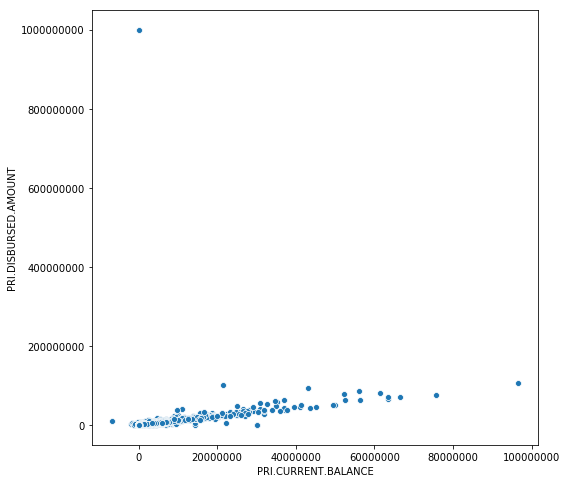

In [275]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=data['PRI.CURRENT.BALANCE'],y=data['PRI.DISBURSED.AMOUNT'])
plt.ticklabel_format(style='plain', axis='both')
# As we can see, there is a linear dependency between the Current Balance and the Disbursed amount. Although there are a few outliers.

#### PRI.DISBURSED.AMOUNT

In [276]:
data['PRI.DISBURSED.AMOUNT'].describe().apply(lambda x: format(x,'f'))

count        233154.000000
mean         218065.898655
std         2377743.846150
min               0.000000
25%               0.000000
50%               0.000000
75%           60800.000000
max      1000000000.000000
Name: PRI.DISBURSED.AMOUNT, dtype: object

#### SEC.NO.OF.ACCTS

In [277]:
data['SEC.NO.OF.ACCTS'].value_counts()
# Most of the customers who have loans as a primary customer do not have any loan as a secondary customer.

0     227289
1       3466
2       1036
3        444
4        292
5        148
6        119
7         75
8         68
9         38
10        35
11        29
13        17
12        13
16        11
14        11
15        10
18         6
19         6
17         5
20         4
22         4
23         4
31         4
21         3
46         2
24         2
38         2
30         2
34         2
37         1
42         1
28         1
35         1
29         1
25         1
52         1
Name: SEC.NO.OF.ACCTS, dtype: int64

#### SEC.ACTIVE.ACCTS

In [278]:
data['SEC.ACTIVE.ACCTS'].value_counts()

0     229337
1       2684
2        636
3        195
4        116
5         65
6         32
7         22
8         17
9         11
10         9
11         7
12         6
15         4
13         3
16         2
22         2
26         1
14         1
17         1
20         1
21         1
36         1
Name: SEC.ACTIVE.ACCTS, dtype: int64

#### SEC.OVERDUE.ACCTS

In [279]:
data['SEC.OVERDUE.ACCTS'].value_counts()

0    231817
1      1129
2       126
3        47
4        19
5         8
6         6
8         1
7         1
Name: SEC.OVERDUE.ACCTS, dtype: int64

#### SEC.CURRENT.BALANCE

In [280]:
data['SEC.CURRENT.BALANCE'].describe().apply(lambda x: format(x,'f'))

count      233154.000000
mean         5427.792819
std        170236.994637
min       -574647.000000
25%             0.000000
50%             0.000000
75%             0.000000
max      36032852.000000
Name: SEC.CURRENT.BALANCE, dtype: object

#### SEC.SANCTIONED.AMOUNT

In [281]:
data['SEC.SANCTIONED.AMOUNT'].describe().apply(lambda x: format(x,'f'))

count      233154.000000
mean         7295.923347
std        183155.993069
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max      30000000.000000
Name: SEC.SANCTIONED.AMOUNT, dtype: object

#### SEC.DISBURSED.AMOUNT

In [282]:
data['SEC.DISBURSED.AMOUNT'].describe().apply(lambda x: format(x,'f'))

count      233154.000000
mean         7179.997873
std        182592.500073
min             0.000000
25%             0.000000
50%             0.000000
75%             0.000000
max      30000000.000000
Name: SEC.DISBURSED.AMOUNT, dtype: object

#### PRIMARY.INSTAL.AMT

In [283]:
data['PRIMARY.INSTAL.AMT'].describe().apply(lambda x: format(x,'f'))

count      233154.000000
mean        13105.481720
std        151367.904716
min             0.000000
25%             0.000000
50%             0.000000
75%          1999.000000
max      25642806.000000
Name: PRIMARY.INSTAL.AMT, dtype: object

#### SEC.INSTAL.AMT

In [284]:
data['SEC.INSTAL.AMT'].describe().apply(lambda x: format(x,'f'))

count     233154.000000
mean         323.268449
std        15553.691339
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max      4170901.000000
Name: SEC.INSTAL.AMT, dtype: object

In [286]:
#data['TOTAL_INSTAL_AMT'] = data['PRIMARY.INSTAL.AMT'] + data['SEC.INSTAL.AMT']
#test['TOTAL_INSTAL_AMT'] = test['PRIMARY.INSTAL.AMT'] + test['SEC.INSTAL.AMT']

#### NEW.ACCTS.IN.LAST.SIX.MONTHS

In [48]:
data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

#### DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [49]:
data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
12         3
11         3
10         2
9          2
20         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

#### NO.OF_INQUIRIES

In [50]:
data['NO.OF_INQUIRIES'].value_counts()
# Majority of the customers have made 0 or 1 inquiry about the loan.

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO.OF_INQUIRIES, dtype: int64

#### AVERAGE.ACCT.AGE

In [51]:
data['AVERAGE.ACCT.AGE'].nunique()

192

In [52]:
# Create a new column with the Average Loan Tenure in Months
def account_age(df,column):
    df[column] = df[column].str[0].astype(int)*12 + df[column].str[-4].astype(int)
account_age(data,'AVERAGE.ACCT.AGE')
account_age(test,'AVERAGE.ACCT.AGE')

#### CREDIT.HISTORY.LENGTH

In [53]:
# Create a new column with time since first loan in months
def credit_history(df,column):
    df[column] = df[column].str[0].astype(int)*12 + df[column].str[-4].astype(int)
credit_history(data,'CREDIT.HISTORY.LENGTH')
credit_history(test,'CREDIT.HISTORY.LENGTH')

In [54]:
continuous_columns = list(data.select_dtypes(exclude=['object','bool']).columns)

In [55]:
continuous_columns

['disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'loan_default',
 'Age',
 'Disbursed_Month',
 'Disbursed_Day',
 'Disbursed_Quarter',
 'Disbursed_Day_Of_Week']

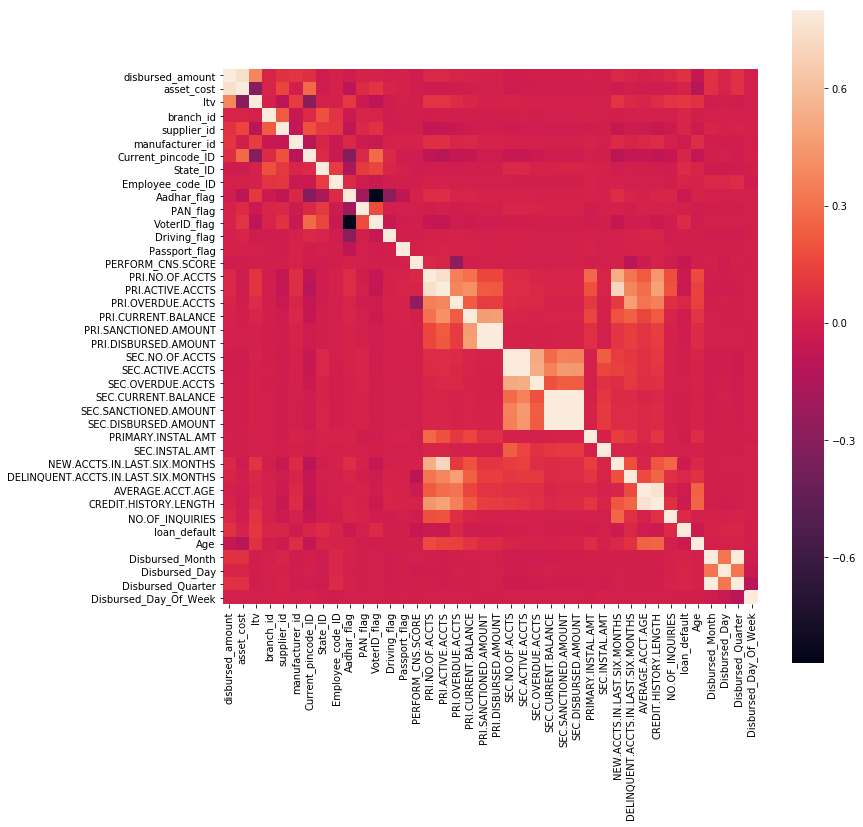

In [56]:
corr_mat = data[continuous_columns].corr()
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(corr_mat, vmax = 0.8, square= True)
# None of the variables are highly correlated to the Loan_Default variable.

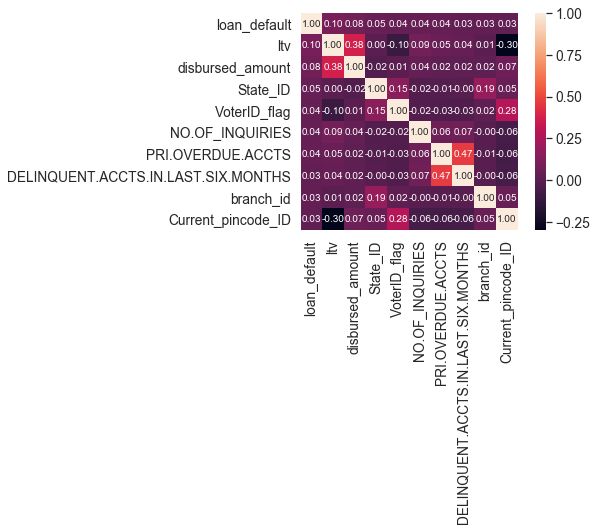

In [58]:
k = 10
cols = corr_mat.nlargest(k, 'loan_default')['loan_default'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [59]:
# Replacing the . in column names with _ so that all columns have similar nomenclature.
data.columns = data.columns.str.replace(".","_")
test.columns = test.columns.str.replace(".","_")

In [60]:
data.shape,test.shape

((233154, 44), (112392, 43))

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 44 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Employment_Type                        233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                           233154 non-null int64
Passport_flag                   

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 43 columns):
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Employment_Type                        112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
Aadhar_flag                            112392 non-null int64
PAN_flag                               112392 non-null int64
VoterID_flag                           112392 non-null int64
Driving_flag                           112392 non-null int64
Passport_flag                   

### MultiVariate Analysis 

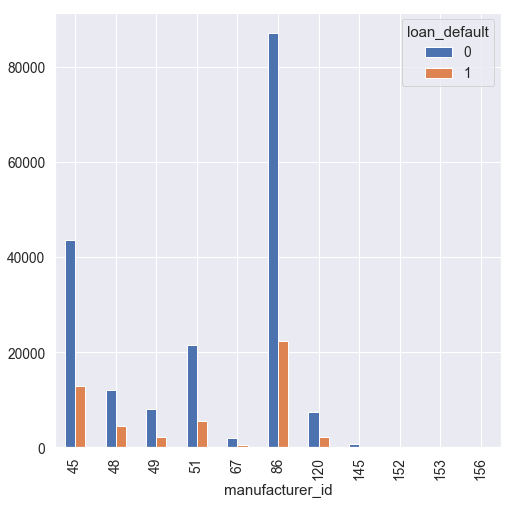

In [63]:
plt.figure(figsize=(8,8))
data.groupby('manufacturer_id')['loan_default'].value_counts().unstack().sort_index().plot.bar(figsize=(8,8))

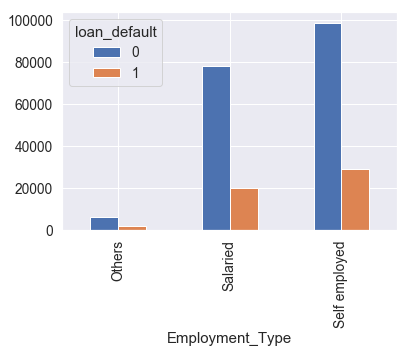

In [64]:
data.groupby('Employment_Type')['loan_default'].value_counts().unstack().plot.bar()
# It can be noted that the Self Employed people have higher percentage of loan default as compared to Salaried people

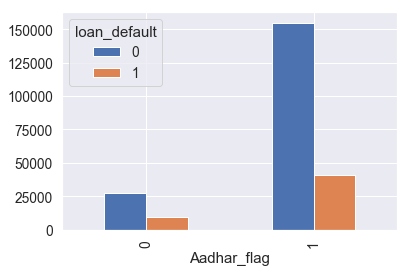

In [65]:
data.groupby('Aadhar_flag')['loan_default'].value_counts().unstack().plot.bar()
# It can be noted that if the person has not submitted Adhar Card, he/she has higher chances of defaulting on the loan.

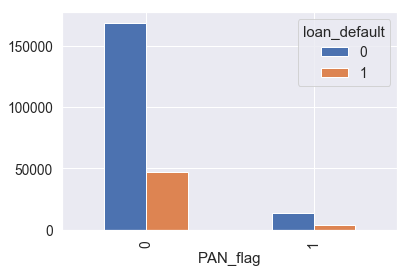

In [66]:
data.groupby('PAN_flag')['loan_default'].value_counts().unstack().plot.bar()
# Most of the customers have not furnished their PAN card details also the loan default among them is high.

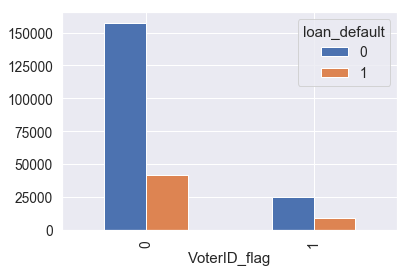

In [67]:
data.groupby('VoterID_flag')['loan_default'].value_counts().unstack().plot.bar()
# Similar to PAN, many customer have not provided their Voter ID details .

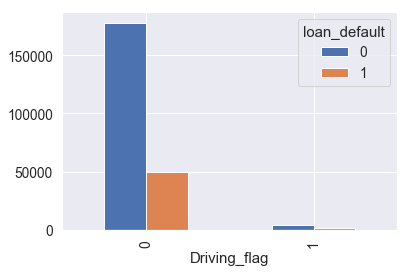

In [68]:
data.groupby('Driving_flag')['loan_default'].value_counts().unstack().plot.bar()
# Similar to PAN, many customer have not provided their Driving Licence ID details .

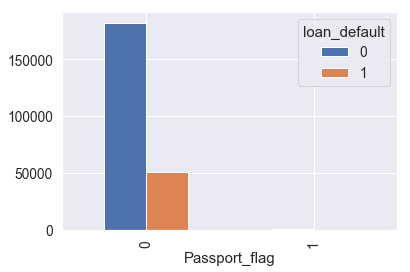

In [69]:
data.groupby('Passport_flag')['loan_default'].value_counts().unstack().plot.bar()

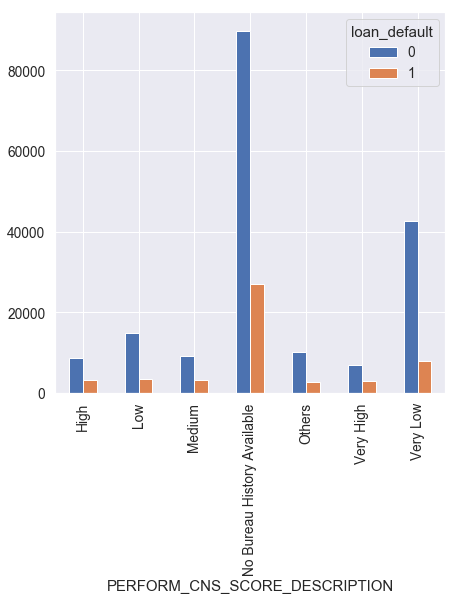

In [70]:
data.groupby('PERFORM_CNS_SCORE_DESCRIPTION')['loan_default'].value_counts().unstack().plot.bar(figsize=(7,7))
# We can see that most of the customers have no credit score and the default percentage is high among them.

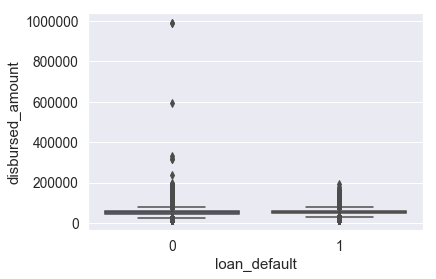

In [71]:
sns.boxplot(data=data,x='loan_default',y='disbursed_amount')
# We can see almost similar median value (may be this is because of the replacement), some extreme values as well.

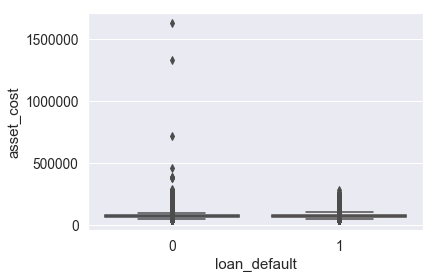

In [72]:
sns.boxplot(data=data,x='loan_default',y='asset_cost')

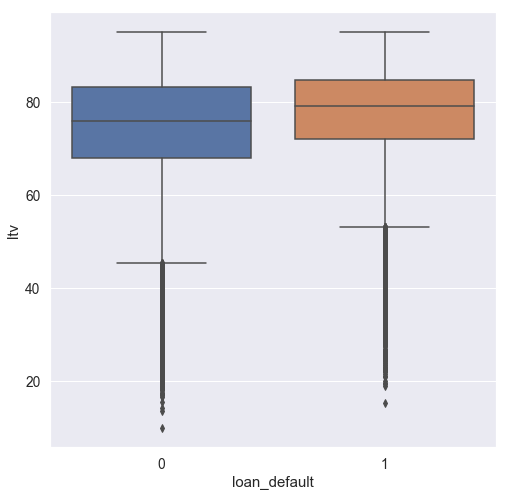

In [73]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data,x='loan_default',y='ltv')
# There is some difference in the median value and the 75th percentile values.

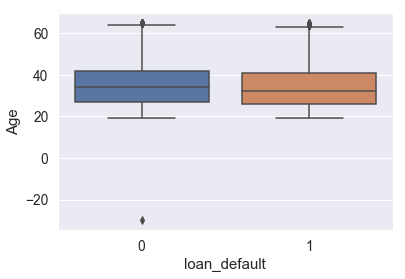

In [74]:
sns.boxplot(data=data,x='loan_default',y='Age')

In [75]:
data.drop(['branch_id', 'supplier_id','manufacturer_id', 'Current_pincode_ID','State_ID','Employee_code_ID'],axis=1,inplace=True)
test.drop(['branch_id','supplier_id','manufacturer_id','Current_pincode_ID','State_ID','Employee_code_ID'],axis=1,inplace=True)

In [76]:
data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'loan_default', 'Age',
       'Disbursed_Month', 'Disbursed_Day', 'Disbursed_Quarter',
       'Disbursed_Qtr_End', 'Disbursed_Qtr_Start', 'Disbursed_Day_Of_Week'],
      dtype='object')

In [77]:
test.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'Age', 'Disbursed_Month',
       'Disbursed_Day', 'Disbursed_Quarter', 'Disbursed_Qtr_End',
       'Disbursed_Qtr_Start', 'Disbursed_Day_Of_Week'],
      dtype='object')

In [79]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [80]:
data.head()

,disbursed_amount,asset_cost,ltv,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default,Age,Disbursed_Month,Disbursed_Day,Disbursed_Quarter,Disbursed_Qtr_End,Disbursed_Qtr_Start,Disbursed_Day_Of_Week,Employment_Type_Others,Employment_Type_Salaried,Employment_Type_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_High,PERFORM_CNS_SCORE_DESCRIPTION_Low,PERFORM_CNS_SCORE_DESCRIPTION_Medium,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Others,PERFORM_CNS_SCORE_DESCRIPTION_Very High,PERFORM_CNS_SCORE_DESCRIPTION_Very Low
0,50578,58400,89.55,1,0,0,0,0,580.784267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,3,8,1,False,False,3,0,1,0,0,0,0,1,0,0,0
1,47145,65550,73.23,1,0,0,0,0,598.000000,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,13,13,0,1,34,9,26,3,False,False,2,0,0,1,0,0,1,0,0,0,0
2,53278,61360,89.63,1,0,0,0,0,580.784267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,1,8,1,False,False,0,0,0,1,0,0,0,1,0,0,0
3,57513,66113,88.48,1,0,0,0,0,305.000000,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,26,10,26,4,False,False,4,0,0,1,0,0,0,0,0,1,0
4,52378,60300,88.39,1,0,0,0,0,580.784267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,42,9,26,3,False,False,2,0,0,1,0,0,0,1,0,0,0


In [81]:
test.head()

,disbursed_amount,asset_cost,ltv,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,Age,Disbursed_Month,Disbursed_Day,Disbursed_Quarter,Disbursed_Qtr_End,Disbursed_Qtr_Start,Disbursed_Day_Of_Week,Employment_Type_Others,Employment_Type_Salaried,Employment_Type_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_High,PERFORM_CNS_SCORE_DESCRIPTION_Low,PERFORM_CNS_SCORE_DESCRIPTION_Medium,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Others,PERFORM_CNS_SCORE_DESCRIPTION_Very High,PERFORM_CNS_SCORE_DESCRIPTION_Very Low
0,53478,63558,86.54,1,0,0,0,0,594.220408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3,11,1,False,False,6,0,1,0,0,0,0,1,0,0,0
1,55513,63163,89.45,1,0,0,0,0,749.000000,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,8,12,1,34,11,20,4,False,False,1,0,0,1,0,0,0,0,0,0,1
2,65282,84320,79.93,1,1,0,0,0,594.220408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,11,29,4,False,False,3,0,1,0,0,0,0,1,0,0,0
3,46905,63896,76.58,1,0,0,0,0,14.000000,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,29,29,0,46,11,29,4,False,False,3,0,0,1,0,0,0,0,1,0,0
4,51428,63896,86.08,1,0,0,0,0,594.220408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,11,17,4,False,False,5,0,1,0,0,0,0,1,0,0,0


In [82]:
train = data.copy()
tst  = test.copy()

In [83]:
X = data[[col for col in data.columns if col != 'loan_default']]
y = data['loan_default']

In [84]:
# Handing Class imbalance
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [86]:
"""
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.3)
print (X_Train.shape)
print (y_Train.shape)
print (X_Test.shape)
print (y_Test.shape)
"""

'\nX_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.3)\nprint (X_Train.shape)\nprint (y_Train.shape)\nprint (X_Test.shape)\nprint (y_Test.shape)\n'

In [329]:
predictors = data[[col for col in data.columns if col != 'loan_default']].columns
target = 'loan_default'

#### RF

In [164]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=180,max_features='log2',min_samples_leaf=20,)
rf.fit(X_Train,y_Train)
cv = cross_val_score(rf,X_Train,y_Train,cv=5,scoring='roc_auc')
print (cv)
print (cv.mean())

[ 0.6472929   0.64371932  0.64153147  0.64772035  0.64042452]
0.644137711308


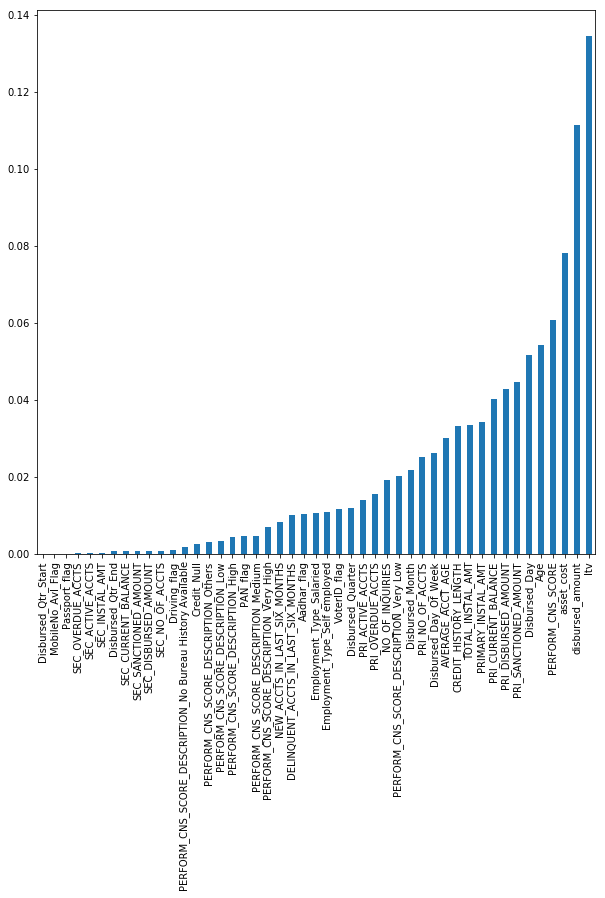

In [165]:
plt.figure(figsize=(10,10))
ser = pd.Series(rf.feature_importances_,X_Train.columns).sort_values()
ser.plot(kind='bar')

#### RF-2

In [132]:
test = pd.read_csv("test_bqCt9Pv.csv")

In [133]:
Unique_ID = test[['UniqueID']]
test.drop('UniqueID',axis=1,inplace=True)

In [134]:
col = 'Date.of.Birth'
test[col] = pd.to_datetime(test[col])
future = test[col] > date(year=2050,month=1,day=1)
test.loc[future, col] -= timedelta(days=365.25*100)
test['Age'] = 2019 - test['Date.of.Birth'].dt.year
test.drop('Date.of.Birth',axis=1,inplace=True)

In [135]:
test['Employment.Type'].fillna(test['Employment.Type'].value_counts().index[0],inplace=True)

In [136]:
test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'])
test['Disbursed_Month'] = test['DisbursalDate'].dt.month
test['Disbursed_Day'] = test['DisbursalDate'].dt.day
test['Disbursed_Quarter'] = test['DisbursalDate'].dt.quarter
test['Disbursed_Qtr_End'] = test.DisbursalDate.dt.is_quarter_end
test['Disbursed_Qtr_Start'] = test.DisbursalDate.dt.is_quarter_start
test['Disbursed_Day_Of_Week'] = test['DisbursalDate'].dt.dayofweek

In [137]:
replacement = 580.784267
test['PERFORM_CNS.SCORE'].replace({0:np.NaN},inplace=True)
test['Credit_Null'] = test['PERFORM_CNS.SCORE'].isnull()
test['PERFORM_CNS.SCORE'].fillna(replacement,inplace=True)

In [138]:
test['PERFORM_CNS.SCORE.DESCRIPTION'].replace({"A-Very Low Risk":"Very Low","B-Very Low Risk":"Very Low","C-Very Low Risk":"Very Low"
                                              ,"D-Very Low Risk":"Very Low","E-Low Risk":"Low","F-Low Risk":"Low","G-Low Risk":"Low"
                                              ,"H-Very Medium Risk":"Medium","I-Medium Risk":"Medium","J-High Risk":"High",
                                              "K-High Risk":"High","L-Very High Risk":"Very High","M-Very High Risk":"Very High",
                                              "H-Medium Risk":"Medium","Not Scored: Sufficient History Not Available":"Others",
                                              "Not Scored: Not Enough Info available on the customer":"Others","Not Scored: No Activity seen on the customer (Inactive)":"Others",
                                              "Not Scored: No Updates available in last 36 months":"Others","Not Scored: Only a Guarantor":"Others",
                                              "Not Scored: More than 50 active Accounts found":"Others"},inplace=True)

In [141]:
test['AVERAGE.ACCT.AGE'] = test['AVERAGE.ACCT.AGE'].str[0].astype(int)*12 + test['AVERAGE.ACCT.AGE'].str[-4].astype(int)

In [142]:
test['CREDIT.HISTORY.LENGTH'] = test['CREDIT.HISTORY.LENGTH'].str[0].astype(int)*12 + test['CREDIT.HISTORY.LENGTH'].str[-4].astype(int)

In [ ]:
test['TOTAL_INSTAL_AMT'] = test['PRIMARY_INSTAL_AMT']+test['SEC_INSTAL_AMT']

In [147]:
test = pd.get_dummies(test)

In [150]:
test.drop('DisbursalDate',axis=1,inplace=True)

In [154]:
test.columns = test.columns.str.replace(".","_")

In [166]:
test.drop(['branch_id','supplier_id','manufacturer_id','Current_pincode_ID','State_ID','Employee_code_ID'],axis=1,inplace=True)

In [167]:
pred = rf.predict(test)
Unique_ID['loan_default'] = pred
Unique_ID.to_csv("Submission_3.csv",index=None)

#### XGB

In [134]:
def modelfit(alg, ip, op,dtest,dataframe,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(ip, label=op)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(ip, op,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(ip)
    dtrain_predprob = alg.predict_proba(ip)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    #print ("F1 Score (Train): %f" % f1_score(dtrain['loan_default'], dtrain_predictions))
    #print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['is_promoted'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(op, dtrain_predprob))
    
    #Predict on testing data:
    dataframe['loan_default'] = alg.predict(np.array(dtest))
    dataframe.to_csv("XGB_Submission_Latest.csv",index=None)
                
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances',figsize=(10,10))
    plt.ylabel('Feature Importance Score')

[0]	train-auc:0.836731+0.00811514	test-auc:0.835413+0.00878059
[1]	train-auc:0.860946+0.00706728	test-auc:0.859658+0.00653226
[2]	train-auc:0.867277+0.00610854	test-auc:0.865811+0.0048939
[3]	train-auc:0.87141+0.00528567	test-auc:0.869744+0.00377281
[4]	train-auc:0.87454+0.00645967	test-auc:0.87294+0.00520035
[5]	train-auc:0.878714+0.00447525	test-auc:0.877131+0.00465871
[6]	train-auc:0.88097+0.00374733	test-auc:0.879335+0.00428722
[7]	train-auc:0.883914+0.00228098	test-auc:0.882234+0.00295871
[8]	train-auc:0.886319+0.00195684	test-auc:0.88467+0.00286213
[9]	train-auc:0.887875+0.00172115	test-auc:0.88617+0.00264538
[10]	train-auc:0.889227+0.00153293	test-auc:0.887435+0.00207397
[11]	train-auc:0.891301+0.000688643	test-auc:0.889422+0.00153481
[12]	train-auc:0.892323+0.000854873	test-auc:0.890343+0.00137134
[13]	train-auc:0.89301+0.000872554	test-auc:0.890901+0.0015908
[14]	train-auc:0.894205+0.000844064	test-auc:0.892023+0.0012164
[15]	train-auc:0.89499+0.000956276	test-auc:0.892667+0.0

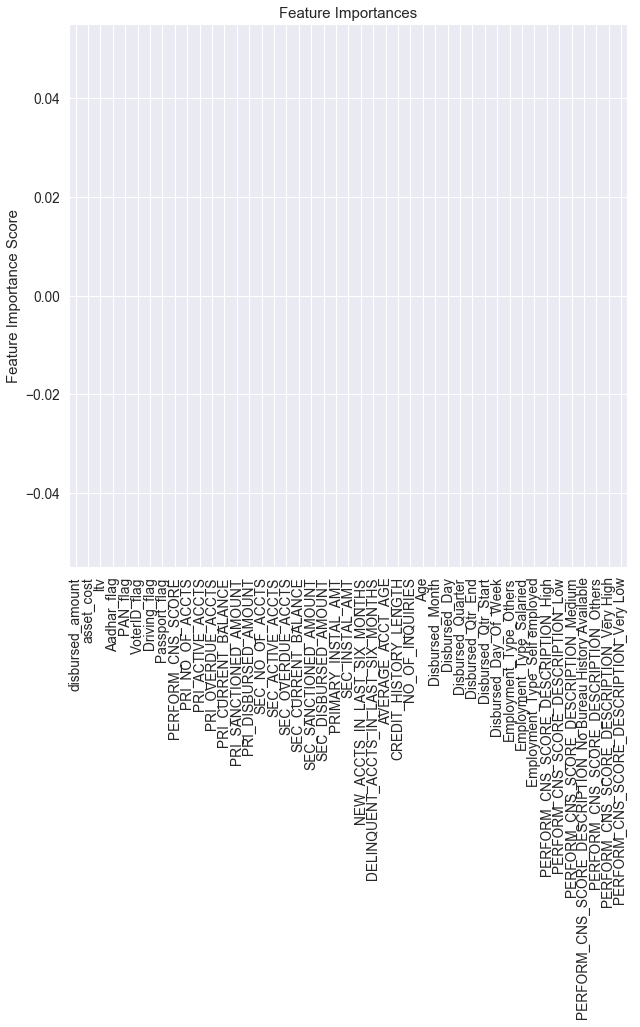

In [118]:
#Choose all predictors except target & IDcols
predictors = [col for col in data.columns if col!='loan_default']
xgb1 = XGBClassifier(
 learning_rate =1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1,X_smt,y_smt,test,Unique_ID)

#### RF-3

In [122]:
param_grid = {"n_estimators":list(range(50,1000,100)),
              "max_features":[0.5,'sqrt','log2'],
              "min_samples_leaf":list(range(20,100,10)),
              "min_samples_split":list(range(25,50,5)),
              "max_depth":list(range(3,10,2))}
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
random = RandomizedSearchCV(estimator=rf,cv=5,scoring="roc_auc",param_distributions=param_grid)
random.fit(X_smt,y_smt)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [50, 150, 250, 350, 450, 550, 650, 750, 850, 950], 'max_features': [0.5, 'sqrt', 'log2'], 'min_samples_leaf': [20, 30, 40, 50, 60, 70, 80, 90], 'min_samples_split': [25, 30, 35, 40, 45], 'max_depth': [3, 5, 7, 9]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [133]:
Unique_ID['loan_default'] = random.best_estimator_.predict(test)
Unique_ID.to_csv("RF_Submission.csv",index=False)

In [124]:
random.best_params_.

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 30,
 'min_samples_split': 40,
 'n_estimators': 850}

In [125]:
random.best_score_

0.87360044808757498

In [126]:
random.cv_results_

C:\Users\m1013523\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\m1013523\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\m1013523\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*wa

{'mean_fit_time': array([  58.92638335,   19.26021018,  105.93862462,   94.59079742,
         269.03540082,  161.6274744 ,   64.73313642,  217.49296274,
         118.19669852,   30.27256927]),
 'mean_score_time': array([ 1.64076896,  0.37169218,  1.79354491,  1.6141932 ,  1.3800271 ,
         0.89774103,  1.65462518,  1.42940955,  1.62766356,  0.34145522]),
 'mean_test_score': array([ 0.82408058,  0.87158726,  0.85911612,  0.85931179,  0.87103722,
         0.8710967 ,  0.82800224,  0.85607749,  0.87360045,  0.82430252]),
 'mean_train_score': array([ 0.8298221 ,  0.87997885,  0.86541214,  0.86562883,  0.88012749,
         0.88008848,  0.83295606,  0.86416443,  0.88232661,  0.82827292]),
 'param_max_depth': masked_array(data = [3 7 5 5 7 7 3 5 7 3],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_max_features': masked_array(data = ['log2' 'log2' 'sqrt' 'sqrt' 0.5 0.5 'sqrt' 0.5 'sqrt' 0.5],
              mask = [False F

#### XGB-3

In [139]:
def modelfit(alg, ip, op,dtest,dataframe,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(ip, label=op)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(ip, op,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(ip)
    dtrain_predprob = alg.predict_proba(ip)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    #print ("F1 Score (Train): %f" % f1_score(dtrain['loan_default'], dtrain_predictions))
    #print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['is_promoted'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(op, dtrain_predprob))
    
    #Predict on testing data:
    dataframe['loan_default'] = alg.predict(np.array(dtest))
    dataframe.to_csv("XGB_Sub.csv",index=None)
                
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances',figsize=(10,10))
    plt.ylabel('Feature Importance Score')

[0]	train-auc:0.798759+0.00529145	test-auc:0.798989+0.00602971
[1]	train-auc:0.82878+0.00733099	test-auc:0.828236+0.00778889
[2]	train-auc:0.840596+0.0119324	test-auc:0.839913+0.0116895
[3]	train-auc:0.850351+0.00986189	test-auc:0.849616+0.00840632
[4]	train-auc:0.858727+0.0119952	test-auc:0.858117+0.0108055
[5]	train-auc:0.867985+0.00407629	test-auc:0.867479+0.00466046
[6]	train-auc:0.869544+0.00489111	test-auc:0.868976+0.00591575
[7]	train-auc:0.874521+0.00444166	test-auc:0.873946+0.00525049
[8]	train-auc:0.876133+0.00321219	test-auc:0.875574+0.00443634
[9]	train-auc:0.878604+0.00134032	test-auc:0.878042+0.00281529
[10]	train-auc:0.88083+0.00141949	test-auc:0.880265+0.00249925
[11]	train-auc:0.883208+0.00152193	test-auc:0.882428+0.00161678
[12]	train-auc:0.883666+0.00141108	test-auc:0.882826+0.00167714
[13]	train-auc:0.884856+0.00104412	test-auc:0.883953+0.00159746
[14]	train-auc:0.885924+0.00129408	test-auc:0.884961+0.00142264
[15]	train-auc:0.886659+0.00132562	test-auc:0.885737+0.0

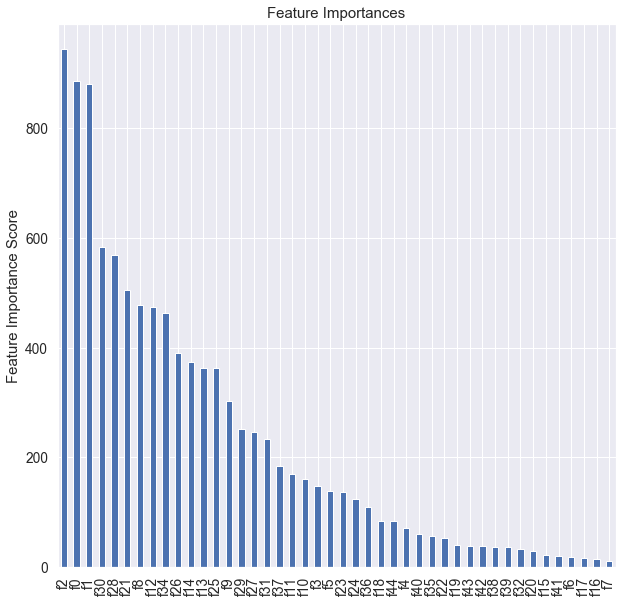

In [141]:
#Choose all predictors except target & IDcols
predictors = [col for col in data.columns if col!='loan_default']
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=9,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1,X_smt,y_smt,test,Unique_ID)